In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization

In [2]:
company_data = pd.read_csv(r"E:\DS_ML_PYTHON\DS_ML\Module4_Machine_Learning\Supervised_ML\Day14_Linear_regression\Coding_understanding\Input_files\1000_Companies.csv")

In [3]:
company_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
#Check number of rows
len(company_data)
#len(company_data.columns) #Count Columns

1000

In [5]:
#Check for NA's if exist #Missing Values Check
company_data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
#Check for Datatypes of each column
company_data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [7]:
#Convert string catogorical data into numbers
company_data['State'].unique()
company_data['State'] = company_data['State'].astype('category')
company_data['State'] = company_data['State'].cat.codes

In [8]:
company_data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State                 int8
Profit             float64
dtype: object

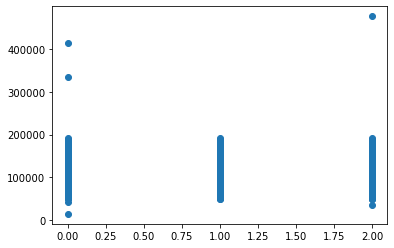

In [9]:
plt.scatter(company_data['State'], company_data['Profit'])

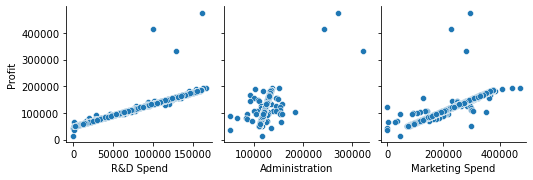

In [10]:
#Check the linear relationship between IV's and DV

sns.pairplot(company_data, x_vars=['R&D Spend','Administration','Marketing Spend'],y_vars=['Profit'])

In [11]:
#Check Multi-collinearity
company_data.iloc[:,:-2].corr()

,R&D Spend,Administration,Marketing Spend
R&D Spend,1.000000,0.582434,0.978407
Administration,0.582434,1.000000,0.520465
Marketing Spend,0.978407,0.520465,1.000000


In [12]:
#Split the data into IV's and DV
#X = company_data.drop(['Profit','Marketing Spend'], axis=1) #IV's
X = company_data.drop('Profit', axis=1) #IV's
y= company_data['Profit']               #DV

In [13]:
X.head(2)

,R&D Spend,Administration,Marketing Spend,State
0,165349.2,136897.80,471784.10,2
1,162597.7,151377.59,443898.53,0


In [14]:
#splitting dataset into train and test
from sklearn.model_selection import train_test_split #splitting the data
X_Train,X_Test,y_train,y_test = train_test_split(X,y, test_size=0.20, random_state=333)

In [15]:
len(X_Train), len(X_Test)

(800, 200)

In [16]:
#Calling the model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_Train,y_train) # Training the model
# lin_reg.fit(1 + 1, 2)
# lin_reg.fit([R&D Spend,Administration,Marketing Spend,State], Profit)
y_pred = lin_reg.predict(X_Test) # y_test predicted values values we will be getting here
# y_pred = lin_reg.predict(2 + 2)
# lin_reg.predict([R&D Spend,Administration,Marketing Spend,State])

In [17]:
y_pred

array([ 94439.88257542, 121524.76824548, 177309.87985942,  61265.7947198 ,
        51561.53363371, 164313.40942084,  72681.65990469,  59107.49842136,
       111673.65666526, 147542.10213991, 176893.01339455,  99282.53291085,
        98689.85218118, 161979.82217697, 167581.22575776,  76426.67112608,
       130652.12320881, 157963.67153161, 134626.6441307 ,  84442.85928001,
       155223.63663854,  73868.14493682,  95338.43786233, 128244.49505782,
       142978.94792307,  76640.66782094, 139454.64331584, 156845.61001412,
        62403.15507031, 143450.1099548 ,  52120.00266398, 186136.19284579,
        74480.04768299, 111324.95210871, 144910.31996684, 121124.27663823,
       170364.95249874,  60726.88623865, 123636.52542365, 106212.54740718,
        99616.58631711, 174752.8157678 , 117945.56782235, 103724.95335646,
       109388.67066712,  72696.91130401, 101680.68091231, 125811.19657734,
       174079.46102923,  72552.38465007, 185504.20623114,  95247.08332032,
        57898.94421487,  

In [24]:
company_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [25]:
lin_reg.predict([[142107.34,91391.77,366168.42,1]])

C:\Users\Kishore kumar V\pythonconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([127536.10137948])

In [18]:
#evaluating the model
#calculating the  R squared  # 0 - 1
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
display(r2_score(y_test,y_pred))

0.9569767949675002

In [19]:
def mean_absolute_percentage_error(y_test, y_pred): # MAPE
#     y_true, y_pred = check_arrays(y_true, y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [20]:
mean_absolute_percentage_error(y_test, y_pred)

1.8268711045455905